In [34]:
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd 

## Current Density - Overpotential Plot for Bard 3.1

In [35]:
#Constants
j0 = 0.00965
alphaa = 0.3
alphac = 0.7
R = 8.314
T = 298 
F = 96485
n = 1
EEq = 0.771
z = 1
jmax = 600
A = 1 
CO1 = 1 
CR1 = 1 
kTO = 10**(-7)


def ExchangeCurrent(alpha, k, CO, CR):
     return n * F * A * CO**(1-alpha) * CR**(alpha) * k 

EC = ExchangeCurrent(alphaa, kTO, CO1, CR1)
#Finding Voltage Boundaries
etamax  = (R*T)/(alphaa*z*F)*np.log(jmax/j0)
Eta = np.linspace(-(etamax), etamax, 500)

#Equations for the curves
def CurrentDensityA(Eta):
    return j0 * np.exp((1-alphaa)*z*F*Eta/(R*T))

def CurrentDensityC(Eta):
    return (-j0 * np.exp(-alphaa*z*F*Eta/(R*T)))

CurrentDensitya = CurrentDensityA(Eta)
CurrentDensityc = CurrentDensityC(Eta)


Text(0, 0.5, 'Current Density (A/cm^2)')

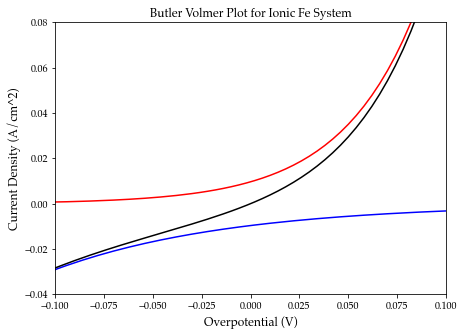

In [36]:
#Plotting for Current Density-Overpotential

fig = plt.figure(figsize = (7,5))

#Axis limits
#plt.xlim(min(Eta),max(Eta))
#plt.ylim(-600,600)
plt.xlim(-.1,.1)
plt.ylim(-.04,.08)


plt.plot(Eta/max(Eta),CurrentDensitya, color = 'red')
plt.plot(Eta/max(Eta),CurrentDensityc, color = 'blue')
plt.plot(Eta/max(Eta),CurrentDensitya+CurrentDensityc, color = 'black')

#Font selection
matplotlib.rcParams['font.serif'] = "Palatino"
matplotlib.rcParams['font.family'] = "serif"

#Plot Labeling
plt.title('Butler Volmer Plot for Ionic Fe System')
plt.xlabel('Overpotential (V)', fontsize = '12')
plt.ylabel('Current Density (A/cm^2)', fontsize = '12')



## Tafel Plot

In [37]:

#Deriving log of current density
CurrentDensityTotal = CurrentDensitya+CurrentDensityc
logja = np.log10(abs(CurrentDensitya))
TafelCurrentDensityc = abs(CurrentDensityc)
logjc = np.log10(TafelCurrentDensityc)



Text(0, 0.5, 'Current Density (A/cm^2)')

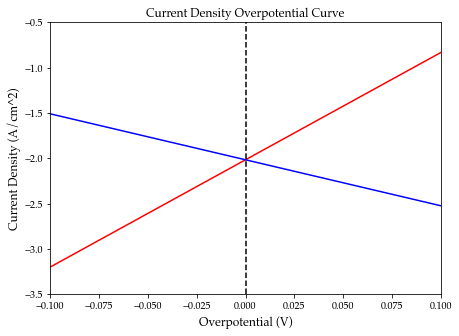

In [38]:
#Plotting for Tafel Plot

fig = plt.figure(figsize = (7,5))

#Axis limits
#plt.xlim(min(Eta),max(Eta))
#plt.ylim(-600,600)
plt.xlim(-.1,.1)
plt.ylim(-3.5,-0.5)


plt.plot(Eta,logja, color = 'red')
plt.plot(Eta,logjc, color = 'blue')

plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k', linestyle =  '--')
#plt.plot(Eta,logja+logjc, color = 'black')

#Font selection
matplotlib.rcParams['font.serif'] = "Palatino"
matplotlib.rcParams['font.family'] = "serif"

#Plot Labeling
plt.title('Current Density Overpotential Curve')
plt.xlabel('Overpotential (V)', fontsize = '12')
plt.ylabel('Current Density (A/cm^2)', fontsize = '12')

# $\iota \eta$ plots for Bard 3.3


In [42]:
#Constants for 3.3
A = 1
CO2 = 1.0*10**(-3)
CR2 = 1.0*10**(-5)
mO = 0.01
mR = 0.01
n=1
a=0.5
kTT=1.0*10**(-4)
f = F/(R*T)
i0 = ExchangeCurrent(a, kTT, CO2, CR2)

#Find ilc and ila
def iancat(m, C):
    return n * F * m * C

ila = iancat(mR,CR2)
ilc = iancat(mO,CO2)

#Creating the DataFrame full of data
Potential = np.arange(-1.5,0.05,.05)
Overpotential = Potential + 0.5
df = pd.DataFrame({'Potential': Potential, 'Overpotential': Overpotential})
df = df.round(3)

def exp1(Overpotential):
    return np.exp(-a * f * Overpotential)

def exp2(Overpotential):
    return np.exp((1-a) * f * Overpotential)

def Current(Overpotential, ilc, ila):
    return (exp1(Overpotential) - exp2(Overpotential))/ ((1/i0) + (exp1(Overpotential)/ilc) - (exp2(Overpotential)/ila))

exp1set = exp1(df.Overpotential)
df['exp1'] = exp1set
exp2set = exp2(df.Overpotential)
df['exp2'] = exp1set
CurrentBT = abs(Current(df.Overpotential, ilc, ila))
df['Current'] = CurrentBT
logCurrent = np.log10(df['Current'])
df['logCurrent'] = logCurrent

df = df.round(5)
df

/Users/Michael/opt/miniconda3/envs/emlab/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Potential,Overpotential,exp1,exp2,Current,logCurrent
0,-1.50,-1.00,2.860521e+08,2.860521e+08,0.96485,-0.01554
1,-1.45,-0.95,1.080495e+08,1.080495e+08,0.96484,-0.01554
2,-1.40,-0.90,4.081319e+07,4.081319e+07,0.96483,-0.01555
3,-1.35,-0.85,1.541623e+07,1.541623e+07,0.96479,-0.01557
4,-1.30,-0.80,5.823124e+06,5.823124e+06,0.96468,-0.01561
5,-1.25,-0.75,2.199550e+06,2.199550e+06,0.96441,-0.01574
6,-1.20,-0.70,8.308288e+05,8.308288e+05,0.96369,-0.01606
7,-1.15,-0.65,3.138263e+05,3.138263e+05,0.96179,-0.01692
8,-1.10,-0.60,1.185406e+05,1.185406e+05,0.95678,-0.01919
9,-1.05,-0.55,4.477595e+04,4.477595e+04,0.94377,-0.02513


Text(0, 0.5, 'Current Density (A/cm^2)')

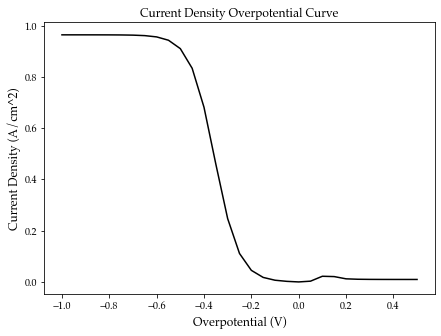

In [40]:
#Plot Current vs Overpotential
fig = plt.figure(figsize = (7,5))

# plt.xlim(-1,.5)
# plt.ylim(-0.02,.01)

plt.plot(df.Overpotential,df.Current, color = 'black')

#Font selection
matplotlib.rcParams['font.serif'] = "Palatino"
matplotlib.rcParams['font.family'] = "serif"

#Plot Labeling
plt.title('Current Density Overpotential Curve')
plt.xlabel('Overpotential (V)', fontsize = '12')
plt.ylabel('Current Density (A/cm^2)', fontsize = '12')


Text(0, 0.5, 'Current Density (A/cm^2)')

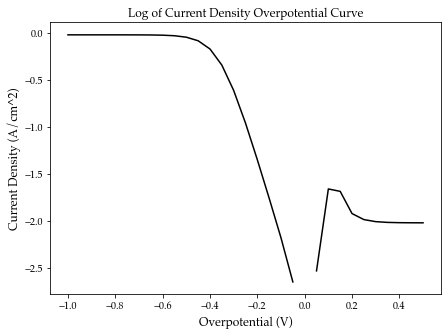

In [41]:
#Plot log of Current vs Overpotential
fig = plt.figure(figsize = (7,5))

# plt.xlim(-1,.5)
# plt.ylim(-0.02,.01)

plt.plot(df.Overpotential,df.logCurrent, color = 'black')

#Font selection
matplotlib.rcParams['font.serif'] = "Palatino"
matplotlib.rcParams['font.family'] = "serif"

#Plot Labeling
plt.title('Log of Current Density Overpotential Curve')
plt.xlabel('Overpotential (V)', fontsize = '12')
plt.ylabel('Current Density (A/cm^2)', fontsize = '12')